In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import math
import numpy as np
from sklearn.datasets import make_friedman2
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
import Kan_NN
import importlib
importlib.reload(Kan_NN)

<module 'Kan_NN' from 'c:\\Users\\JP\\Documents\\TU Berlin\\Master\\Code_clean\\Kan_NN.py'>

In [3]:
from sklearn.preprocessing import StandardScaler
def get_loader(in_dim, noise, n_samples=20000):
    # Set the seed for reproducibility
    seed = 42
    np.random.seed(seed)
    torch.manual_seed(seed)

    # Generate the Friedman dataset
    X_train, y_train = make_friedman2(n_samples=int(n_samples * 0.8), random_state=seed, noise=noise)
    X_test, y_test = make_friedman2(n_samples=int(n_samples * 0.2), random_state=seed, noise=0.0)

    # Reshape targets to match expected input dimensions
    y_train = np.expand_dims(y_train, axis=1)
    y_test = np.expand_dims(y_test, axis=1)

    # Apply feature scaling (Standardization) ONLY to `X`
    scaler_X = StandardScaler()
    X_train = scaler_X.fit_transform(X_train)  # Fit and transform training data
    X_test = scaler_X.transform(X_test)        # Transform test data (using train stats)

    # Convert numpy arrays to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)  # Keep `y` unchanged
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32)    # Keep `y` unchanged

    # Create TensorDataset for train and test sets
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

    # Set batch size and create DataLoader for training and testing
    batch_size = 1024
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

    return train_loader, test_loader


In [4]:
@torch.no_grad()
def compute_test_loss(test_loader, model):
    criterion = torch.nn.MSELoss()
    running_loss = 0.
    for batch, target in test_loader:
        outputs = model(batch)
        loss = criterion(target, outputs)
        running_loss += loss.item()
    return running_loss / len(test_loader)

4 2 [32]
Epoch [1/1000], Loss: 372457.902344, test: 368802.275949, lr: 0.001000
Epoch [2/1000], Loss: 370817.558594, test: 368519.726568, lr: 0.001000
Epoch [3/1000], Loss: 370832.890625, test: 367545.636135, lr: 0.001000
Epoch [4/1000], Loss: 368146.253906, test: 361874.885285, lr: 0.001000
Epoch [5/1000], Loss: 354298.861328, test: 329836.735244, lr: 0.001000
Epoch [6/1000], Loss: 283773.969727, test: 205565.149682, lr: 0.001000
Epoch [7/1000], Loss: 145553.356445, test: 126804.258979, lr: 0.001000
Epoch [8/1000], Loss: 108173.552246, test: 97741.709635, lr: 0.001000
Epoch [9/1000], Loss: 89041.515137, test: 81362.962851, lr: 0.001000
Epoch [10/1000], Loss: 74382.030518, test: 68041.455259, lr: 0.001000
Epoch [11/1000], Loss: 62305.599121, test: 56962.950044, lr: 0.001000
Epoch [12/1000], Loss: 52265.140625, test: 48004.667310, lr: 0.001000
Epoch [13/1000], Loss: 44257.285645, test: 40976.694440, lr: 0.001000
Epoch [14/1000], Loss: 37996.672852, test: 35708.637513, lr: 0.001000
Epoch

C:\Users\JP\AppData\Local\Temp\ipykernel_19488\2434274158.py:30: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), max_norm = 1)


Epoch [370/1000], Loss: 9.173928, test: 10.111402, lr: 0.001000
Epoch [371/1000], Loss: 14.267956, test: 10.743535, lr: 0.001000
Epoch [372/1000], Loss: 13.515529, test: 9.571756, lr: 0.001000
Epoch [373/1000], Loss: 13.045849, test: 9.752529, lr: 0.001000
Epoch [374/1000], Loss: 14.133930, test: 11.629086, lr: 0.001000
Epoch [375/1000], Loss: 16.838799, test: 14.973901, lr: 0.001000
Epoch [376/1000], Loss: 20.940063, test: 19.656912, lr: 0.001000
Epoch [377/1000], Loss: 26.243463, test: 25.608733, lr: 0.001000
Epoch [378/1000], Loss: 33.190106, test: 32.793325, lr: 0.001000
Epoch [379/1000], Loss: 40.909320, test: 41.190188, lr: 0.001000
Epoch [380/1000], Loss: 50.020895, test: 50.781645, lr: 0.001000
Epoch [381/1000], Loss: 60.208040, test: 61.552096, lr: 0.001000
Epoch [382/1000], Loss: 71.738236, test: 73.476853, lr: 0.001000
Epoch [383/1000], Loss: 84.221051, test: 86.556367, lr: 0.001000
Epoch [384/1000], Loss: 98.211165, test: 100.760053, lr: 0.001000
Epoch [385/1000], Loss: 112

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 5.357619, test: 1.409100, lr: 0.001000


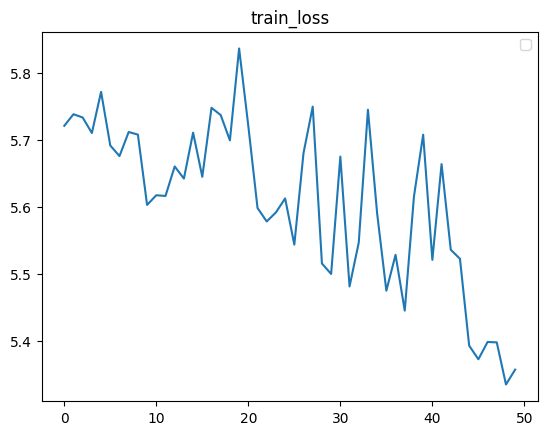

Training Complete!
4 5 [32]


C:\Users\JP\AppData\Local\Temp\ipykernel_19488\2434274158.py:30: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), max_norm = 1)


Epoch [1/1000], Loss: 372493.597656, test: 368803.355258, lr: 0.001000
Epoch [2/1000], Loss: 370865.412109, test: 368536.945499, lr: 0.001000
Epoch [3/1000], Loss: 370929.433594, test: 367696.529050, lr: 0.001000
Epoch [4/1000], Loss: 368721.226562, test: 363382.108965, lr: 0.001000
Epoch [5/1000], Loss: 359851.158203, test: 344312.446025, lr: 0.001000
Epoch [6/1000], Loss: 323571.927734, test: 285888.369426, lr: 0.001000
Epoch [7/1000], Loss: 238111.617188, test: 171984.673405, lr: 0.001000
Epoch [8/1000], Loss: 131710.537109, test: 113329.982360, lr: 0.001000
Epoch [9/1000], Loss: 99910.190430, test: 88982.617175, lr: 0.001000
Epoch [10/1000], Loss: 77654.274414, test: 65998.930236, lr: 0.001000
Epoch [11/1000], Loss: 56530.709961, test: 47443.784979, lr: 0.001000
Epoch [12/1000], Loss: 40672.626709, test: 34548.863494, lr: 0.001000
Epoch [13/1000], Loss: 30988.041992, test: 28351.861450, lr: 0.001000
Epoch [14/1000], Loss: 26527.252808, test: 25055.852635, lr: 0.001000
Epoch [15/100

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 34.869135, test: 3.308300, lr: 0.001000


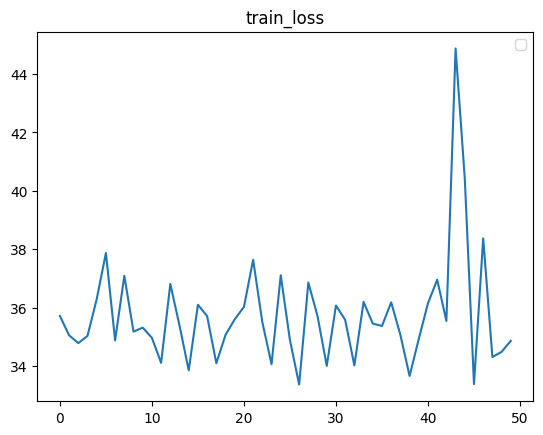

Training Complete!
4 2 [128]


C:\Users\JP\AppData\Local\Temp\ipykernel_19488\2434274158.py:30: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), max_norm = 1)


Epoch [1/1000], Loss: 371326.273438, test: 368011.415410, lr: 0.001000
Epoch [2/1000], Loss: 367608.345703, test: 353775.876443, lr: 0.001000
Epoch [3/1000], Loss: 299410.290039, test: 187740.644959, lr: 0.001000
Epoch [4/1000], Loss: 146263.863770, test: 119325.440619, lr: 0.001000
Epoch [5/1000], Loss: 101456.891602, test: 82551.337004, lr: 0.001000
Epoch [6/1000], Loss: 61327.603760, test: 40805.670363, lr: 0.001000
Epoch [7/1000], Loss: 29395.843750, test: 21787.111905, lr: 0.001000
Epoch [8/1000], Loss: 18095.020020, test: 13875.018460, lr: 0.001000
Epoch [9/1000], Loss: 10055.311005, test: 6581.588809, lr: 0.001000
Epoch [10/1000], Loss: 5160.389801, test: 3759.853492, lr: 0.001000
Epoch [11/1000], Loss: 2855.422806, test: 1957.501052, lr: 0.001000
Epoch [12/1000], Loss: 1312.713482, test: 775.865247, lr: 0.001000
Epoch [13/1000], Loss: 547.301830, test: 375.377017, lr: 0.001000
Epoch [14/1000], Loss: 324.999823, test: 275.624301, lr: 0.001000
Epoch [15/1000], Loss: 266.318354, t

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 11.885235, test: 10.740811, lr: 0.001000


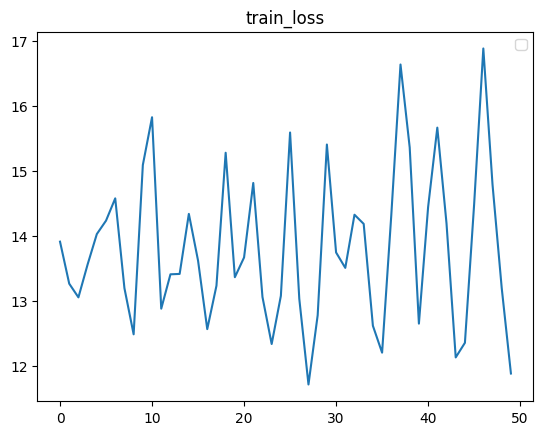

Training Complete!
4 5 [128]


C:\Users\JP\AppData\Local\Temp\ipykernel_19488\2434274158.py:30: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), max_norm = 1)


Epoch [1/1000], Loss: 371361.593750, test: 368011.415799, lr: 0.001000
Epoch [2/1000], Loss: 367647.804688, test: 353775.801201, lr: 0.001000
Epoch [3/1000], Loss: 299438.714844, test: 187740.659905, lr: 0.001000
Epoch [4/1000], Loss: 146282.973633, test: 119341.573629, lr: 0.001000
Epoch [5/1000], Loss: 101478.366699, test: 82582.294108, lr: 0.001000
Epoch [6/1000], Loss: 61381.762939, test: 40875.188935, lr: 0.001000
Epoch [7/1000], Loss: 29441.970825, test: 21782.975740, lr: 0.001000
Epoch [8/1000], Loss: 18141.658875, test: 13937.158084, lr: 0.001000
Epoch [9/1000], Loss: 10370.077332, test: 7082.591363, lr: 0.001000
Epoch [10/1000], Loss: 5634.891022, test: 4097.610602, lr: 0.001000
Epoch [11/1000], Loss: 2890.620712, test: 1845.494414, lr: 0.001000
Epoch [12/1000], Loss: 1434.296432, test: 1096.687585, lr: 0.001000
Epoch [13/1000], Loss: 781.631447, test: 832.891162, lr: 0.001000
Epoch [14/1000], Loss: 461.051361, test: 320.288130, lr: 0.001000
Epoch [15/1000], Loss: 299.009787, 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 57.293010, test: 42.148849, lr: 0.001000


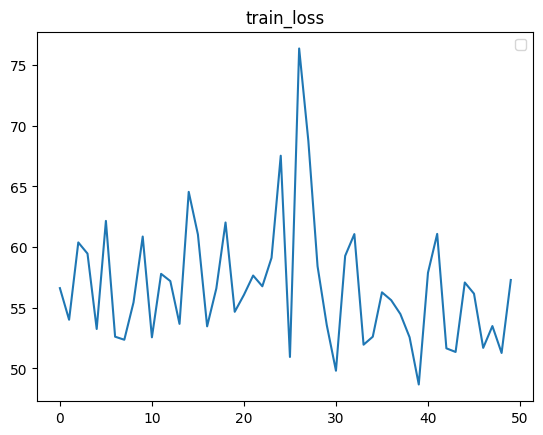

Training Complete!


In [5]:
import time
import dill
adjust = True 
widths = [[32],[128]]
n_samples = 20000
in_dims = [4]
noises = [2,5]
train_losses = []
test_losses = []
for width in widths:
    for in_dim in in_dims:
        for noise in noises:
            print(in_dim, noise, width)
            shape = [in_dim,6,3,2,1,1]
            train_loader, test_loader = get_loader(in_dim, noise,n_samples)
            model = Kan_NN.Neural_Kan(shape = shape, h = width)
            epochs = 1000
            model.train()
            optimizer = optim.AdamW(model.parameters(), lr=0.001)
            criterion = torch.nn.MSELoss()
            for epoch in range(epochs):
                running_loss = 0.0 
                for batch, target in train_loader:
                    start_time = time.time()
                    optimizer.zero_grad()
                    outputs = model(batch)
                    loss = criterion(target, outputs)
                    loss.backward()
                    if not adjust:
                        torch.nn.utils.clip_grad_norm(model.parameters(), max_norm = 1)
                    optimizer.step()
                    running_loss += loss.item()
                avg_loss = running_loss / len(train_loader)
                model.train_loss.append(avg_loss)
                test_l = compute_test_loss(test_loader, model)
                model.test_loss.append(test_l)
                if (test_l < 1) and (adjust):
                    adjust = False
                #    for param_group in optimizer.param_groups:
                #        param_group['lr'] *= 0.1

                print(f"Epoch [{epoch + 1}/{epochs}], Loss: {avg_loss:.6f}, test: {test_l:.6f}, lr: {optimizer.param_groups[0]['lr']:6f}")
            plt.plot(model.train_loss[-50:])
            plt.title(f'train_loss')
            plt.legend()
            plt.show()
            print("Training Complete!")
            with open(f"models/Friedmann_2_KAN_{width[0]}_{noise}_{in_dim}.dill", "wb") as f:
                dill.dump(model, f)
            #with open(f"models/KAN_{width[0]}_{noise}_{in_dim}.dill", "wb") as f:
            #    dill.dump(model, f)

